In [2]:
from keras import models 
import keras.utils as image
import matplotlib.pyplot as plt
import numpy as np
import cv2 

2024-05-05 16:46:55.562139: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model_name = "cifar100.h5"

%store -r test_dir
%store -r train_dir
%store -r class_names
%store -r class_numbers

In [4]:
print(class_names)

['/cattle', '/clock', '/house', '/mountain', '/plate', '/telephone', '/train']


1/1 [==============================] - 0s 60ms/step


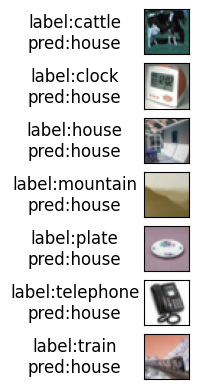

In [18]:
model=models.load_model(model_name)

for x,name in enumerate(class_names):
    tahmin_list=[]
    random=np.random.randint(1,100)
    path=(test_dir + name + '/' + str(random) + ".png")
    Giris1=image.load_img(path,
                          target_size=(32,32))

    #Numpy dizisine dönüştür
    Giris=image.img_to_array(Giris1)
    #Görüntüuü ağa uygula
    y=model.predict(Giris.reshape(1,32,32,3))
    #En yüksek tahmin sınıfını bul
    tahmin_indeks=np.argmax(y)
    tahmin_yuzde=y[0][tahmin_indeks]*100
    
    ax3 =plt.subplot(len(class_names), 1, x+1)
    ax3.set_yticks([])
    ax3.set_xticks([])
    plt.text(
        -50, 16,
        'label:{0}\npred:{1}'.format(class_names[x][1:],class_names[tahmin_indeks][1:]),
        rotation=0, verticalalignment='center', horizontalalignment='center', fontsize=12
    )
    # ax3.set_xlabel('label:{0}\npred:{1}'.format(class_names[x][1:],class_names[tahmin_indeks][1:]))
    plt.imshow(Giris1)